# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("JFkeys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
#print(json.dumps(btc_response, indent = 4))
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
btc_price


54025.0

In [6]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
#print(json.dumps(eth_response,indent = 4))
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

2368.71

In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = eth_price * my_eth
#my_btc_value
#my_eth_value
# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $64830.00
The current value of your 5.3 ETH is $12554.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
spy_stocks = 50
agg_bonds = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("Alpaca_keys")
secret_api_key = os.getenv("secret_key")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    secret_api_key,
    api_version="v2"
)


In [10]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Format current date as ISO format
today = pd.Timestamp("2021-4-16", tz = "America/New_York").isoformat()

# Get current closing prices for SPY and AGG
stock_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
stock_portfolio

AGG                                      SPY  \
                             open     high    low   close   volume    open   
time                                                                         
2021-04-16 00:00:00-04:00  114.56  114.665  114.5  114.54  3488514  417.25   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-16 00:00:00-04:00  417.91  415.73  417.31  66624780

In [11]:
# Pick AGG and SPY close prices
agg_close = float(stock_portfolio["AGG"]["close"])
spy_close = float(stock_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $114.54
Current SPY closing price: $417.31


In [12]:
# Compute the current value of shares
agg_value = agg_close * agg_bonds
spy_value = spy_close * spy_stocks

# Print current value of share
print(f"The current value of your {spy_stocks} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {agg_bonds} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.50
The current value of your 200 AGG shares is $22908.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings = { "amount" : {
    "Crypto" : round(my_eth_value + my_btc_value,2),
    "Stocks" : round(spy_value + agg_value,2)
}
}

# Display savings DataFrame
df_savings = pd.DataFrame(savings)
df_savings

,amount
Crypto,77384.16
Stocks,43773.50


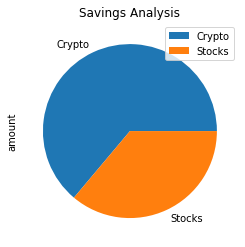

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Savings Analysis");

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_crypto = round(my_eth_value + my_btc_value,2)
total_stocks = round(spy_value + agg_value,2)
# Calculate total amount of savings
total_savings = (total_crypto + total_stocks)
#total_savings = 36000
#print(total_savings)
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations your emergency fund exceeds the recommened amount")
elif total_savings == emergency_fund:
    print("Congratulations your emergency funds is equal to the recommened amount. Keep the saving up and you will be in great shape")
elif total_savings < emergency_fund:
    print(f'You have {total_savings} and we recommened your emergency fund is 3 times your monthly income {emergency_fund}, you are {emergency_fund - total_savings} away.')
          
    

Congratulations your emergency fund exceeds the recommened amount


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-18', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.dropna()

AGG                                         \
                              open      high      low    close     volume   
time                                                                        
2017-04-27 00:00:00-04:00  108.940  109.1000  108.910  109.050  1249545.0   
2017-04-28 00:00:00-04:00  108.980  109.2500  108.910  109.250  2722695.0   
2017-05-01 00:00:00-04:00  108.860  108.9599  108.620  108.735  2335646.0   
2017-05-02 00:00:00-04:00  108.680  108.9400  108.679  108.890  2570794.0   
2017-05-03 00:00:00-04:00  108.970  108.9900  108.770  108.795  1765578.0   
...                            ...       ...      ...      ...        ...   
2021-04-12 00:00:00-04:00  114.172  114.1720  114.000  114.150  3486052.0   
2021-04-13 00:00:00-04:00  114.120  114.4600  114.110  114.460  3882646.0   
2021-04-14 00:00:00-04:00  114.410  114.4400  114.280  114.380  3519353.0   
2021-04-15 00:00:00-04:00  113.780  114.9800  113.780  114.810  5455777.0   
2021-04-16 00:00:00-04:00  114.560  114.6650  114.500  114.540  3488514.0   

                              SPY                                         
                             open      high      low   close      volume  
time                                                                      
2017-04-27 00:00:00-04:00  238.78  238.9500  237.980  238.61  39577860.0  
2017-04-28 00:00:00-04:00  238.90  238.9300  237.930  238.10  42264701.0  
2017-05-01 00:00:00-04:00  238.69  239.1700  238.195  238.65  38750688.0  
2017-05-02 00:00:00-04:00  238.84  238.9800  238.300  238.79  39563850.0  
2017-05-03 00:00:00-04:00  238.32  238.8775  237.700  238.52  47292627.0  
...                           ...       ...      ...     ...         ...  
2021-04-12 00:00:00-04:00  410.85  411.9300  410.200  411.62  51358274.0  
2021-04-13 00:00:00-04:00  411.53  413.5290  411.120  412.82  50616046.0  
2021-04-14 00:00:00-04:00  412.83  413.9600  410.870  411.48  52950990.0  
2021-04-15 00:00:00-04:00  413.74  416.1600  413.690  415.82  54833901.0  
2021-04-16 00:00:00-04:00  417.25  417.9100  415.730  417.31  66624780.0  

[999 rows x 10 columns]

NameError: name 's_date' is not defined

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 *30)

In [20]:
# Printing the simulation input data
MC_sim.portfolio_data

AGG                                         \
                              open      high      low    close     volume   
time                                                                        
2017-04-26 00:00:00-04:00  108.850  108.9700  108.770  108.970  2679957.0   
2017-04-27 00:00:00-04:00  108.940  109.1000  108.910  109.050  1249545.0   
2017-04-28 00:00:00-04:00  108.980  109.2500  108.910  109.250  2722695.0   
2017-05-01 00:00:00-04:00  108.860  108.9599  108.620  108.735  2335646.0   
2017-05-02 00:00:00-04:00  108.680  108.9400  108.679  108.890  2570794.0   
...                            ...       ...      ...      ...        ...   
2021-04-12 00:00:00-04:00  114.172  114.1720  114.000  114.150  3486052.0   
2021-04-13 00:00:00-04:00  114.120  114.4600  114.110  114.460  3882646.0   
2021-04-14 00:00:00-04:00  114.410  114.4400  114.280  114.380  3519353.0   
2021-04-15 00:00:00-04:00  113.780  114.9800  113.780  114.810  5455777.0   
2021-04-16 00:00:00-04:00  114.560  114.6650  114.500  114.540  3488514.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-04-26 00:00:00-04:00          NaN     NaN      NaN      NaN     NaN   
2017-04-27 00:00:00-04:00     0.000734  238.78  238.950  237.980  238.61   
2017-04-28 00:00:00-04:00     0.001834  238.90  238.930  237.930  238.10   
2017-05-01 00:00:00-04:00    -0.004714  238.69  239.170  238.195  238.65   
2017-05-02 00:00:00-04:00     0.001425  238.84  238.980  238.300  238.79   
...                                ...     ...      ...      ...     ...   
2021-04-12 00:00:00-04:00    -0.000263  410.85  411.930  410.200  411.62   
2021-04-13 00:00:00-04:00     0.002716  411.53  413.529  411.120  412.82   
2021-04-14 00:00:00-04:00    -0.000699  412.83  413.960  410.870  411.48   
2021-04-15 00:00:00-04:00     0.003759  413.74  416.160  413.690  415.82   
2021-04-16 00:00:00-04:00    -0.002352  417.25  417.910  415.730  417.31   

                                                    
                               volume daily_return  
time                                                
2017-04-26 00:00:00-04:00         NaN          NaN  
2017-04-27 00:00:00-04:00  39577860.0          NaN  
2017-04-28 00:00:00-04:00  42264701.0    -0.002137  
2017-05-01 00:00:00-04:00  38750688.0     0.002310  
2017-05-02 00:00:00-04:00  39563850.0     0.000587  
...                               ...          ...  
2021-04-12 00:00:00-04:00  51358274.0     0.000450  
2021-04-13 00:00:00-04:00  50616046.0     0.002915  
2021-04-14 00:00:00-04:00  52950990.0    -0.003246  
2021-04-15 00:00:00-04:00  54833901.0     0.010547  
2021-04-16 00:00:00-04:00  66624780.0     0.003583  

[1001 rows x 12 columns]

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004412,0.999891,1.006315,0.996241,1.004822,1.009735,1.006649,1.008971,0.995522,0.987633,...,1.001147,0.986056,1.004508,1.007969,1.004005,0.994493,1.001168,0.993581,0.990157,0.992955
2,1.007585,0.999402,1.005077,0.999347,1.004598,1.009403,0.998730,1.010888,0.999532,0.984073,...,1.004265,0.993742,1.008578,1.008829,0.997765,0.997573,1.000366,1.003077,1.001633,0.978463
3,1.001575,1.004461,0.993114,0.990870,1.019238,1.013189,1.014931,1.015067,1.007619,0.969756,...,0.988532,0.998682,0.998485,1.011353,0.993612,1.004878,1.000144,1.012522,1.001709,0.974461
4,1.002693,1.019084,0.984553,1.001039,1.022192,1.016733,1.007841,1.021215,0.999755,0.960695,...,0.982884,1.010513,0.994539,0.997802,0.994186,1.007136,0.997319,1.012306,0.994057,0.984492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.687776,14.940952,22.992758,29.736995,20.487612,16.449112,25.370414,21.855332,27.020677,10.162000,...,51.021252,15.476124,6.547010,21.092652,14.021269,6.691674,7.624391,41.172543,23.175928,24.096912
7557,35.766994,14.955827,22.819150,29.807617,20.525784,16.529349,25.513582,21.801523,27.196294,10.091115,...,51.237819,15.436009,6.519886,20.836801,14.062073,6.601374,7.697677,41.060019,23.139676,24.272909
7558,36.218840,15.025157,23.057465,30.097732,20.620889,16.630679,25.792630,21.795949,26.820075,9.948672,...,50.407279,15.236535,6.498516,21.108030,14.091637,6.552908,7.668423,41.216826,23.119929,24.364119
7559,36.316004,15.030805,22.970059,30.378077,20.615702,16.669869,25.874934,22.048784,27.157562,9.880666,...,50.363273,15.115121,6.507555,20.921091,14.323158,6.696008,7.646963,41.181828,23.151676,24.217947


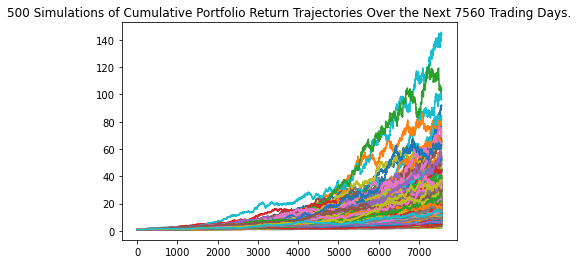

In [122]:
# Plot simulation outcomes
MC_sim.plot_simulation();

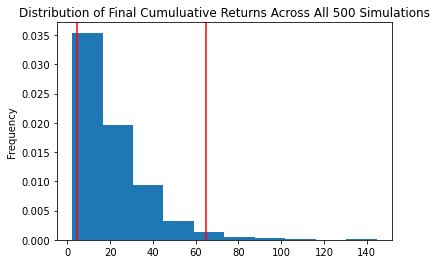

In [125]:
# Plot probability distribution and confidence intervals
MC_sim.plot_distribution();

### Retirement Analysis

In [126]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             21.555588
std              16.779672
min               2.197642
25%              10.310412
50%              16.338984
75%              27.468291
max             144.606000
95% CI Lower      4.477559
95% CI Upper     64.802681
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [132]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89551.18 and $1296053.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [142]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134326.76 and $1944080.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [149]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252 *5)

In [150]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002264,1.007228,1.002489,1.002808,1.000697,0.986748,0.998716,1.000305,1.017507,0.988171,...,1.021134,1.003253,1.011474,1.009764,0.992470,0.990091,1.007378,1.000406,1.011255,1.001924
2,1.007283,1.010579,0.998988,1.010861,1.008259,0.985862,0.989806,1.001384,1.028759,0.983265,...,1.014845,1.006453,1.001009,1.002467,0.967785,1.006434,0.984164,1.007692,1.037850,0.991194
3,1.014982,1.002900,1.000064,1.013438,0.994858,0.958978,1.003342,1.009569,1.022239,1.001916,...,0.986463,1.012207,1.000212,1.003979,0.979207,1.006565,0.983390,1.003182,1.047413,0.972025
4,1.023075,0.982589,1.028104,1.008968,0.997029,0.972998,1.003434,1.012819,1.036437,0.989156,...,0.975820,1.002462,1.015941,1.003689,0.994884,1.003877,0.978864,0.999212,1.021933,0.974276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.437652,1.141618,1.149232,0.990897,2.603253,1.307825,2.524698,0.725110,3.935485,1.660445,...,1.003335,1.244689,2.203910,2.602246,2.434440,1.817273,1.380047,1.656729,1.223221,1.232820
1257,1.413866,1.162957,1.147682,1.009985,2.560850,1.325247,2.530993,0.737547,3.985608,1.665936,...,1.019375,1.273348,2.210407,2.632452,2.467837,1.831246,1.384368,1.660129,1.222162,1.224102
1258,1.387203,1.152684,1.154108,1.019126,2.568836,1.319246,2.540482,0.722394,4.018926,1.656110,...,1.015747,1.256402,2.218538,2.654687,2.499003,1.830177,1.393122,1.679098,1.237864,1.225249
1259,1.414719,1.144059,1.165800,1.015764,2.562787,1.320960,2.528795,0.714700,3.987754,1.649998,...,1.020497,1.270647,2.220079,2.672747,2.489737,1.799649,1.386219,1.703656,1.230359,1.227698


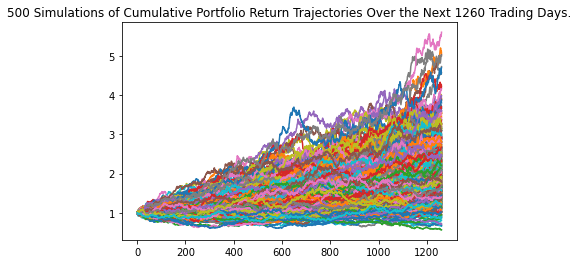

In [151]:
# Plot simulation outcomes
MC_five_yr.plot_simulation();

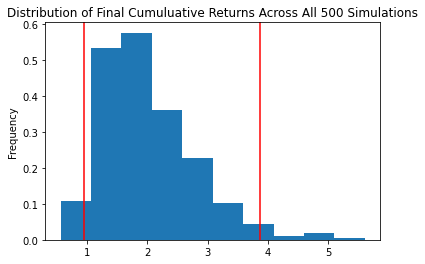

In [152]:
# Plot probability distribution and confidence intervals
MC_five_yr.plot_distribution();

In [148]:
# Fetch summary statistics from the Monte Carlo simulation results
five_yr_sum = MC_five_yr.summarize_cumulative_return()

# Print summary statistics
five_yr_sum

count           500.000000
mean              1.682160
std               0.500829
min               0.600584
25%               1.324051
50%               1.601581
75%               1.944893
max               3.667360
95% CI Lower      0.913539
95% CI Upper      2.878892
Name: 1260, dtype: float64

In [154]:
# Set initial investment
new_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_yr_sum[8]*new_investment,2)
ci_upper_five = round(five_yr_sum[9]*new_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${new_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $45676.95 and $143944.61


### Ten Years Retirement Option

In [155]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252 *10)

In [157]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013541,1.006687,0.991551,0.992743,0.990885,0.996690,0.995307,0.991194,0.997003,1.013000,...,0.982048,1.006451,0.990328,1.002938,0.991665,0.991255,1.003189,0.984012,1.000397,0.984070
2,1.015862,1.002128,0.990469,1.010492,0.997960,1.023728,0.988103,0.997980,0.991692,1.017582,...,0.970557,1.013506,0.992941,1.003918,0.996765,0.983601,1.013007,0.979089,0.984390,0.981864
3,1.019385,1.008475,1.000588,1.018639,1.001486,1.030468,0.987464,0.999821,0.985135,1.015926,...,0.965137,1.016090,1.012222,1.003450,1.003692,0.996737,1.016578,0.974699,0.997367,0.978342
4,1.005553,1.012866,0.989724,1.017796,0.997434,1.038735,0.993691,0.978533,0.989770,1.021887,...,0.954752,1.016652,1.001012,0.987992,0.998873,0.987518,1.032002,0.984852,1.000104,0.963608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.546330,1.819259,2.866790,2.955785,8.032725,5.010179,6.924254,6.534996,1.081650,2.745165,...,1.186768,3.580216,4.239883,5.769771,2.264368,4.196034,6.615292,1.817260,3.310394,8.379371
2517,4.493093,1.798011,2.821454,2.979847,7.978227,5.018427,6.989706,6.434823,1.076641,2.701880,...,1.196974,3.589229,4.180896,5.803889,2.255978,4.156124,6.567525,1.805100,3.325039,8.403385
2518,4.578172,1.786635,2.847488,2.978295,8.036389,4.990578,6.938805,6.477398,1.095502,2.681852,...,1.196463,3.608157,4.162788,5.819430,2.258835,4.163743,6.717704,1.821693,3.309670,8.403369
2519,4.687298,1.768504,2.851386,2.961022,8.060013,5.066647,7.021910,6.454537,1.087221,2.711232,...,1.216266,3.544638,4.195699,5.693910,2.258570,4.194531,6.896085,1.802579,3.276141,8.521508


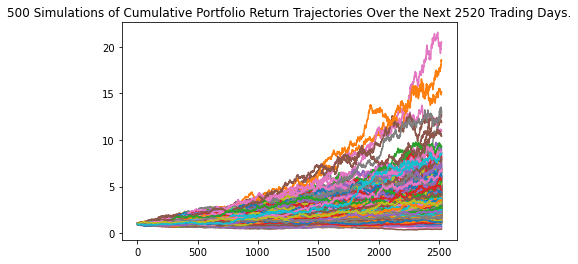

In [159]:
# Plot simulation outcomes
MC_ten_yr.plot_simulation();

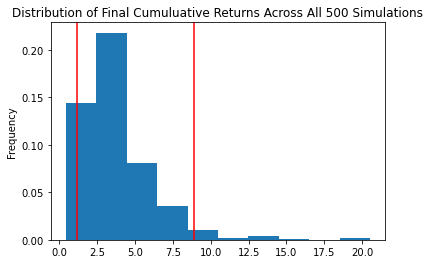

In [160]:
# Plot probability distribution and confidence intervals
MC_ten_yr.plot_distribution();

In [161]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_yr_sum = MC_ten_yr.summarize_cumulative_return()

# Print summary statistics
print(ten_yr_sum)

count           500.000000
mean              3.802665
std               2.333144
min               0.435670
25%               2.300744
50%               3.234493
75%               4.597114
max              20.520635
95% CI Lower      1.194363
95% CI Upper      8.867144
Name: 2520, dtype: float64


In [162]:
# Set initial investment
investment = 70000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_yr_sum[8]*investment,2)
ci_upper_ten = round(ten_yr_sum[9]*investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $70000 in the portfolio over the next 10 years will end within in the range of $83605.41 and $620700.06
